Wage Pressure Model
----------

In [1]:
import pandas as pd
import numpy as np
import math
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_reg = pd.read_csv('2015-2017 Reg Turnover Data_no formula.csv')
df_reg_voluntary = pd.read_csv('2015-2017 Reg Voluntary Turnover Data_No Formulas.csv')

In [3]:
print(df_reg.isnull().sum().sum())
print(df_reg_voluntary.isnull().sum().sum())

0
0


In [4]:
# Separate headcount and turnover

df_reg_count = df_reg.iloc[:, 0:37].copy(deep=True)
df_reg_turnover = df_reg.iloc[:, 37:].copy(deep=True)

# Rename and Join to get Location
col_map = {}
for i in ['2015','2016','2017']:
    for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        v = i + j
        k = i + j + '.1'
        col_map[k] = v

df_reg_turnover.rename(columns=col_map, inplace=True)
df_reg_turnover = df_reg_turnover.join(df_reg['Location'])

In [5]:
# Separate headcount and turnover for voluntary

df_reg_count_voluntary = df_reg_voluntary.iloc[:, 0:37].copy(deep=True)
df_reg_turnover_voluntary = df_reg_voluntary.iloc[:, 37:].copy(deep=True)

# Rename and Join to get Location

df_reg_turnover_voluntary.rename(columns=col_map, inplace=True)
df_reg_turnover_voluntary = df_reg_turnover_voluntary.join(df_reg['Location'])

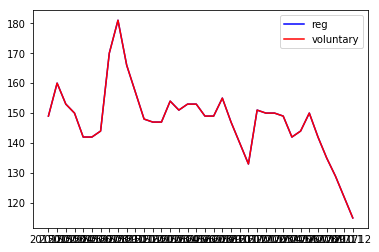

In [6]:
# Compare the df_reg_count and df_reg_count_voluntary Visually.

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_reg_count.iloc[52, 1:], color='b')
ax1.plot(df_reg_count_voluntary.iloc[52, 1:], color='r')
ax1.legend(['reg', 'voluntary'])
plt.show()

In [7]:
# Compare the df_reg_count and df_reg_count_voluntary one by one for all.

store_list1 = []
for i in range(1229):
    l1 = df_reg_count.iloc[i, 1:].tolist()
    l2 = df_reg_count_voluntary.iloc[i, 1:].tolist()
    if l1 != l2:
        store_list1.append(df_reg_count.iloc[i, 0])
        
print(store_list1)

[]


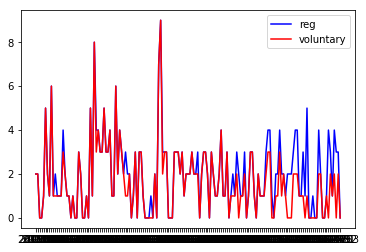

In [8]:
# Compare the df_reg_count and df_reg_count_voluntary.

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_reg_turnover.iloc[52, :-1], color='b')
ax1.plot(df_reg_turnover_voluntary.iloc[52, :-1], color='r')
ax1.legend(['reg', 'voluntary'])
plt.show()

In [9]:
# Compare the df_reg_count and df_reg_count_voluntary one by one for all.

store_list2 = []
for i in range(1229):
    l1 = df_reg_turnover.iloc[i, 1:].tolist()
    l2 = df_reg_turnover_voluntary.iloc[i, 1:].tolist()
    for i,j in zip(l1, l2):
        if i < j:
            store_list2.append(df_reg_count.iloc[i, -1])
            break
        
print(store_list2)

[]


In [10]:
df_lte = pd.read_csv('2015-2017 LTE Turnover Data_No Formulas.csv')
df_lte_voluntary = pd.read_csv('2015-2017 LTE Voluntary Turnover Data_No Formulas.csv')

In [11]:
print(df_reg.isnull().sum().sum())
print(df_reg_voluntary.isnull().sum().sum())

0
0


In [12]:
# Separate headcount and turnover

df_lte_count = df_lte.iloc[:, 0:37].copy(deep=True)
df_lte_turnover = df_lte.iloc[:, 37:].copy(deep=True)

# Rename and Join to get Location

df_lte_turnover.rename(columns=col_map, inplace=True)
df_lte_turnover = df_lte_turnover.join(df_lte['Location'])

In [13]:
# Separate headcount and turnover for voluntary

df_lte_count_voluntary = df_lte_voluntary.iloc[:, 0:37].copy(deep=True)
df_lte_turnover_voluntary = df_lte_voluntary.iloc[:, 37:].copy(deep=True)

# Rename and Join to get Location

df_lte_turnover_voluntary.rename(columns=col_map, inplace=True)
df_lte_turnover_voluntary = df_lte_turnover_voluntary.join(df_lte['Location'])

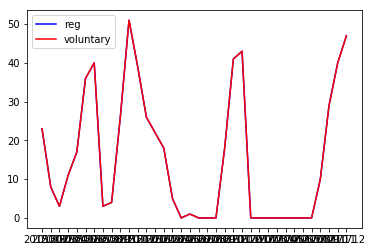

In [14]:
# Compare the df_lte_count and df_lte_count_voluntary Visually.

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_lte_count.iloc[52, 1:], color='b')
ax1.plot(df_lte_count_voluntary.iloc[52, 1:], color='r')
ax1.legend(['reg', 'voluntary'])
plt.show()

In [15]:
# Compare the df_reg_count and df_reg_count_voluntary one by one for all.

store_list3 = []
for i in range(1229):
    l1 = df_lte_count.iloc[i, 1:].tolist()
    l2 = df_lte_count_voluntary.iloc[i, 1:].tolist()
    if l1 != l2:
        store_list3.append(df_reg_count.iloc[i, 0])
        
print(store_list3)

[]


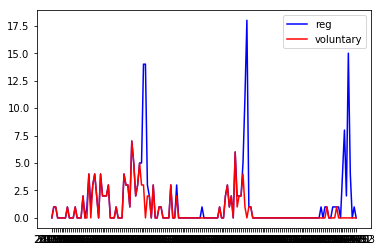

In [16]:
# Compare the df_reg_count and df_reg_count_voluntary.

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_lte_turnover.iloc[52, :-1], color='b')
ax1.plot(df_lte_turnover_voluntary.iloc[52, :-1], color='r')
ax1.legend(['reg', 'voluntary'])
plt.show()

In [17]:
# Compare the df_lte_count and df_lte_count_voluntary one by one for all.

store_list4 = []
for i in range(1229):
    l1 = df_lte_turnover.iloc[i, 1:].tolist()
    l2 = df_lte_turnover_voluntary.iloc[i, 1:].tolist()
    for i,j in zip(l1, l2):
        if i < j:
            store_list4.append(df_reg_count.iloc[i, -1])
            break
        
print(store_list4)

[]


In [18]:
week_to_month = {'201701':'201701', '201702':'201701', '201703':'201701', '201704':'201701', '201705':'201702',
                 '201706':'201702', '201707':'201702', '201708':'201702', '201709':'201703', '201710':'201703',
                 '201711':'201703', '201712':'201703', '201713':'201704', '201714':'201704', '201715':'201704',
                 '201716':'201704', '201717':'201704', '201718':'201705', '201719':'201705', '201720':'201705',
                 '201721':'201705', '201722':'201706', '201723':'201706', '201724':'201706', '201725':'201706',
                 '201726':'201707', '201727':'201707', '201728':'201707', '201729':'201707', '201730':'201707',
                 '201731':'201708', '201732':'201708', '201733':'201708', '201734':'201708', '201735':'201709',
                 '201736':'201709', '201737':'201709', '201738':'201709', '201739':'201709', '201740':'201710',
                 '201741':'201710', '201742':'201710', '201743':'201710', '201744':'201711', '201745':'201711',
                 '201746':'201711', '201747':'201711', '201748':'201712', '201749':'201712', '201750':'201712',
                 '201751':'201712', '201752':'201712', '201753':'201712'}

In [19]:
df_reg_ratio = df_reg_turnover_voluntary.copy(deep=True)[['Location'] + list(week_to_month.keys())].merge(df_reg_count[['Location'] + list(set(week_to_month.values()))], on=['Location'],
                                                                                 suffixes=('', '_m'))

In [20]:
new_map = {k:v + '_m' for k,v in week_to_month.items()}

In [21]:
def get_ratio(x0, x1):
    if x1 != 0:
        return x0 / x1
    elif x0 == 0:
        return 0
    else:
        return 1

for k,v in new_map.items():
    df_reg_ratio[k + '_rate'] = df_reg_ratio[[k, v]].apply(lambda x: get_ratio(x[0], x[1]), axis=1)

In [22]:
new_list = [i + '_rate' for i in list(week_to_month.keys())]
df_reg_ratio = df_reg_ratio[['Location']+ new_list]

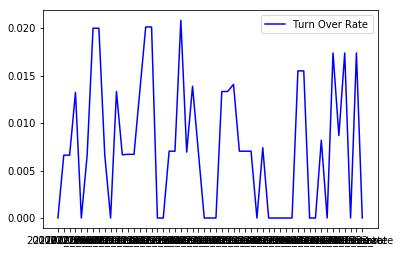

In [23]:
# Compare the df_reg_count and df_reg_count_voluntary.

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_reg_ratio.iloc[52, 1:], color='b')
ax1.legend(['Turn Over Rate'])
plt.show()

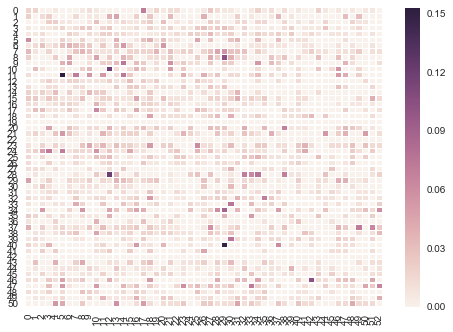

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

data = df_reg_ratio[new_list].as_matrix()

ax = sns.heatmap(data[:51][:], linewidth=0.5)
plt.show()

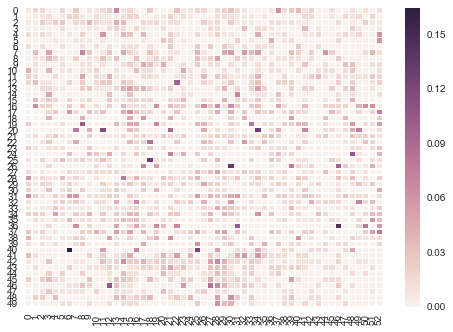

In [25]:
ax = sns.heatmap(data[51:101][:], linewidth=0.5)
plt.show()

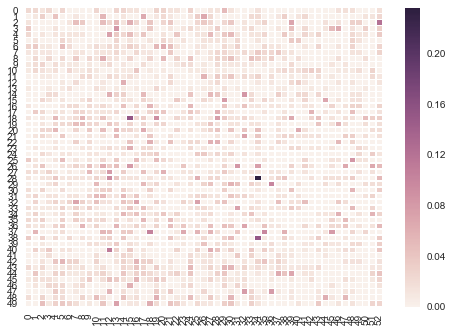

In [26]:
ax = sns.heatmap(data[101:151][:], linewidth=0.5)
plt.show()

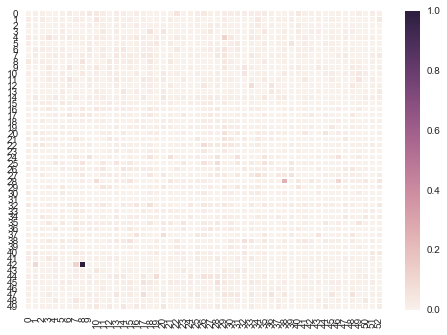

In [27]:
ax = sns.heatmap(data[151:201][:], linewidth=0.5)
plt.show()